## Part 1: Introduction and Setup

In this section, we prepare our environment by importing the necessary libraries and setting seeds for reproducibility. This foundational step ensures that we have all the tools required for data processing, model building, and visualization, while also enabling consistent results across runs.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

To ensure that our experiments can be reproduced exactly, we set the random seed for NumPy and TensorFlow. By fixing the seed, we ensure that operations such as weight initialization produce the same results every time our script is run.

In [2]:
# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

---
## Part 2: Problem Statement

The task is to use a neural network to classify handwritten digits into two categories: 0 and 1. This binary classification problem is a fundamental task in machine learning, offering a practical entry point into the study of neural networks.

### Objective
* Build a model that accurately classifies images of handwritten digits as either 0 or 1.

### Challenge
- The model must handle variability in handwriting styles across a standardized set of 20x20 pixel grayscale images.

- Each image is represented as a 400-dimensional vector (flattened from a 20x20 pixel grid), introducing high-dimensional data that the model must process.

---

## Part 3: Loading the Dataset

This section details the process of loading the MNIST dataset, a commonly used dataset for handwritten digit classification, and preparing it specifically for a binary classification task targeting digits 0 and 1.

In [3]:
def load_data():
    """
    Loads the MNIST dataset, filters it for digits 0 and 1, then prepares it for a binary classification model.
    
    Returns:
        X: A NumPy array containing the filtered and flattened images, shape (1000, 784).
        y: A NumPy array containing the labels for the filtered images, shape (1000, 1).
    """
    # Load the MNIST dataset
    (X_train, y_train), (_, _) = mnist.load_data()
    
    # Filter the dataset for digits 0 and 1
    filter_indices = np.where((y_train == 0) | (y_train == 1))
    X_filtered = X_train[filter_indices]
    y_filtered = y_train[filter_indices]
    
    # Select the first 1000 examples for simplicity
    X_subset = X_filtered[:1000]
    y_subset = y_filtered[:1000]
    
    # Normalize the pixel values for better model performance
    X_normalized = X_subset / 255.0
    
    # Flatten each image to a 784-dimensional vector
    X_flattened = X_normalized.reshape(-1, 28*28)
    
    return X_flattened, y_subset.reshape(-1, 1)


In [4]:
# Load and prepare the data
X, y = load_data()

In [5]:
# Display the shape of the data to confirm the correct structure
print(f"Shape of X: {X.shape}")  # Expected shape: (1000, 784)
print(f"Shape of y: {y.shape}")  # Expected shape: (1000, 1)

Shape of X: (1000, 784)
Shape of y: (1000, 1)


### [Loading the Dataset] Detailed Explanations
1. Loading the MNIST Dataset:

- `mnist.load_data()` returns two tuples: one for the training set (`X_train`, `y_train`) and another for the test set. Here, we are only interested in the training set, hence the use of `(_, _)` to ignore the test set data. This is a common Python practice where `_` is used as a placeholder for data that will not be used.

2. Filtering for Digits 0 and 1:

- We filter `X_train` and `y_train` for images and labels of digits 0 and 1 using `np.where`. This step is crucial for focusing our binary classification on these two digits only.

3. Selecting a Subset:

- For simplicity and computational efficiency, we select the first 1000 examples from our filtered dataset. This subset is sufficient to train our model without overwhelming resources.The slice [:1000] specifies that we start from the beginning (index 0) and end before index 1000, effectively selecting the first 1000 images.

4. Normalizing Pixel Values:

- Pixel values in images range from 0 to 255. We normalize these values to the range [0, 1] by dividing by 255. This normalization helps in speeding up the convergence during model training.

5. Flattening Images:

- Originally, images in the MNIST dataset are 28x28 pixels, represented as 2D arrays. We flatten these arrays into 1D vectors of 784 elements (`28*28`) to feed them into the neural network. This step converts each image into a format that the model can process. It's important to clarify that while we describe the operation as flattening each image into a "784-dimensional vector," in the context of the entire dataset, the result is a matrix (a 2D array). This matrix has a shape of (1000, 784), indicating that it contains 1000 vectors, each of 784 dimensions.

---

## Part 4: Data Visualization

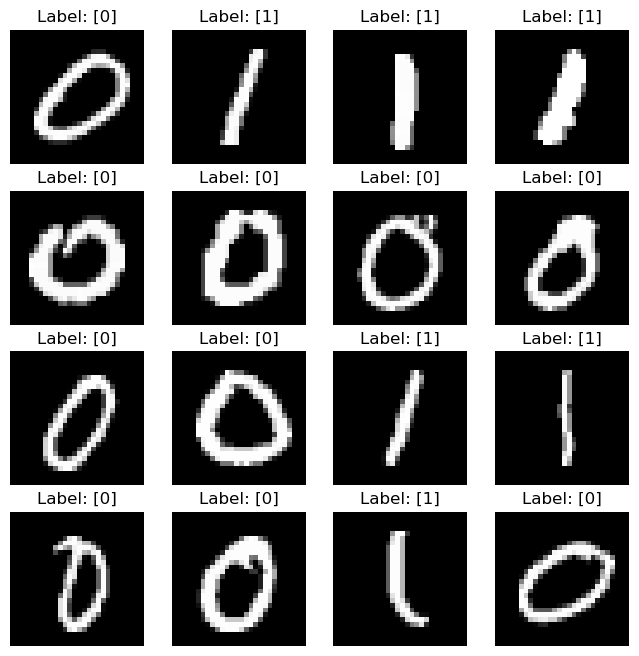

In [6]:
def visualize_data(X, y):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for _, ax in enumerate(axes.flat):
        # Randomly select an image
        rand_index = np.random.randint(0, X.shape[0])
        img = X[rand_index].reshape(28, 28)
        
        # Display the image
        ax.imshow(img, cmap='gray')
        
        # Display the label above the image
        ax.set_title(f"Label: {y[rand_index]}")
        ax.axis('off')

visualize_data(X, y)

---

## Part 5: Building the Neural Network Model

In this part, we will create a neural network that consists of fully connected layers (Dense layers) using TensorFlow's Keras API. The model will take the flattened image vectors as input and output a probability indicating the likelihood that the input image represents the digit 1 (versus digit 0).

In [7]:
def build_model(input_shape):
    """
    Builds a Sequential neural network model using Keras.
    
    Args:
        input_shape (tuple): Shape of the input data (features).
        
    Returns:
        model: A Keras Sequential model.
    """
    model = Sequential([
        # Input layer: Define the input shape based on the dataset
        tf.keras.Input(shape=input_shape),
        
        # First dense layer with ReLU activation
        Dense(units=128, activation='relu'),
        
        # Second dense layer with ReLU activation
        Dense(units=64, activation='relu'),
        
        # Output layer with sigmoid activation for binary classification
        Dense(units=1, activation='sigmoid')
    ])
    
    return model

# Define the model
model = build_model(input_shape=(784,)) # 784 = 28*28, the number of features in our flattened images

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 108801 (425.00 KB)
Trainable params: 108801 (425.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Building the Neural Network Model Detailed Explanations

1. **Defining the Model Structure**:
    - The `Sequential` model from TensorFlow's Keras API is utilized to stack layers linearly. This method is akin to stacking layers of neurons sequentially, where each layer is capable of learning distinct aspects of the data.
   
2. **Input Layer**:
    - `tf.keras.Input(shape=input_shape)`: Specifies the expected shape of the input data to the model. Each image, post-flattening, is a 784-element vector (28x28 pixels). This step sets the input size without adding an actual layer.

3. **Dense Layers**:
    - `Dense(units=128, activation='relu')`: A dense layer with 128 neurons, capable of recognizing various data patterns. The `relu` activation function enables the network to address non-linear problems, facilitating the learning of complex patterns.
    - `Dense(units=64, activation='relu')`: A subsequent dense layer with 64 neurons, enhancing the pattern recognition initiated by the first layer. It continues to use `relu` to support non-linear learning.
   
4. **Output Layer**:
    - `Dense(units=1, activation='sigmoid')`: The final layer tailored for binary classification (digit 0 vs. digit 1), requiring only one neuron. The `sigmoid` activation function compresses the output into a 0 to 1 range, providing a probability that indicates how likely it is for the input image to represent digit 1.

5. **Compiling the Model**:
    - Using `model.summary()`, we obtain a concise summary of the model's architecture, including the count of parameters (weights and biases) each layer will learn during training. This summary is crucial for verifying the structure aligns with our design intentions prior to initiating the training process.

This architecture allows the neural network to discern the subtle distinctions that classify an image as representing digit 0 or 1. Through training on labeled data, the model adjusts its parameters to minimize prediction errors, effectively learning to accurately classify the digits.


---

### Examining Model Weights Before Training

Understanding the structure and initial weights of your model can provide insights into how it will learn and adapt during training. Let's break down the steps to examine the model's weights and what each step signifies:

1. **Extracting Model Layers**:
   To inspect the weights, we first need to access each layer of the model. The `model.layers` attribute provides a list of all the layers in the model.

    ```python
    [layer1, layer2, layer3] = model.layers
    ```

    Here, we're unpacking the layers into variables `layer1`, `layer2`, and `layer3` for easy access. Each variable now represents a layer in the neural network.

2. **Accessing Weights and Biases**:
   Each layer in a Keras model stores its weights (the parameters that will be learned) and biases (offsets) as NumPy arrays. We can retrieve them using the `.get_weights()` method.

    ```python
    W1, b1 = layer1.get_weights()
    W2, b2 = layer2.get_weights()
    W3, b3 = layer3.get_weights()
    ```

    - `W1`, `W2`, `W3` are the weights matrices for layers 1, 2, and 3 respectively.
    - `b1`, `b2`, `b3` are the bias vectors for layers 1, 2, and 3 respectively.

    The shape of these arrays gives us insight into the architecture of the network. For instance, the shape of `W1` corresponds to the number of inputs to that layer and the number of neurons in the layer.

3. **Printing the Shapes**:
   Printing the shapes of the weights and biases arrays helps verify the structure of the model and ensures it's as expected.

    ```python
    print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
    print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
    print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
    ```

    This output provides a quick confirmation of the network's configuration, indicating the connectivity between layers and the size of the model's parameters.

4. **Inspecting Tensors Directly**:
   While `get_weights` returns a NumPy array, you might want to inspect the weight tensors directly in their TensorFlow format. This can be done by accessing the `.weights` attribute of a layer.

    ```python
    print(model.layers[2].weights)
    ```

    This command prints the weight and bias tensors of the third layer in TensorFlow's tensor format, including their shapes and data types. Viewing tensors in this format can be useful for understanding how TensorFlow internally represents these values.

By examining the weights before training, you gain a deeper understanding of your model's initial state. This practice can be particularly useful for debugging and designing complex neural network architectures.


In [8]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 1), b3 shape = (1,)


In [9]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(64, 1) dtype=float32, numpy=
array([[ 0.23235494],
       [ 0.2825824 ],
       [-0.08495058],
       [-0.12556043],
       [-0.26316854],
       [-0.1014566 ],
       [-0.20722216],
       [-0.16731791],
       [-0.18340713],
       [-0.04610905],
       [ 0.27313232],
       [-0.0209713 ],
       [ 0.2698527 ],
       [ 0.24596626],
       [-0.04619893],
       [-0.16892724],
       [ 0.00491861],
       [ 0.07703453],
       [ 0.23949182],
       [-0.00172675],
       [-0.10870752],
       [-0.02410781],
       [-0.05014449],
       [-0.11153182],
       [ 0.22419763],
       [ 0.12350228],
       [-0.02697247],
       [-0.00962242],
       [ 0.00826105],
       [ 0.15329176],
       [-0.22524805],
       [ 0.21627814],
       [ 0.10379863],
       [-0.22653772],
       [-0.29112777],
       [-0.2091595 ],
       [-0.2958373 ],
       [-0.1025535 ],
       [ 0.03510076],
       [-0.22562407],
       [ 0.11487523],
       [-0.09251805],
       

---

## Part 6: Compile the Model and Training the Model

In [10]:
# Compile the model for training
# - 'adam' optimizer is used for gradient descent optimization, well-suited for large datasets and parameters.
# - 'binary_crossentropy' loss function is appropriate for binary classification problems.
# - Tracking 'accuracy' metric to observe performance during training.
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Start training the model on the dataset
# - epochs=20: The entire dataset is passed through the network 20 times. This number of passes is chosen to allow sufficient learning while preventing overfitting.
# - batch_size=32: During each pass, the dataset is divided into batches of 32 samples. This size strikes a balance between training speed and memory usage.
# - validation_split=0.2: Reserves 20% of the training data for validation. This portion is not used for training but to evaluate the model's performance on unseen data, helping monitor and prevent overfitting.
history = model.fit(X, y, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2)


Epoch 1/20
25/25 [==============================] - 1s 11ms/step - loss: 0.1276 - accuracy: 0.9787 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9987 - val_loss: 0.0133 - val_accuracy: 0.9950
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9987 - val_loss: 0.0253 - val_accuracy: 0.9950
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9950
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9950
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 3.7641e-04 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9950
Epoch 8/20
25/2

In [11]:
### Prediction test

prediction = model.predict(X[50].reshape(1,784))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[100].reshape(1,784))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 75ms/step
 predicting a zero: [[2.0891639e-07]]
1/1 [==============================] - 0s 21ms/step
 predicting a one:  [[0.99999785]]


In [12]:
'''
The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one. As in the case of logistic regression, the probability is compared to a threshold to make a final prediction
'''
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


## Part 7: Evaluating the Model*

- While it wasn't explicitly held out a separate test dataset, TensorFlow allows us to use a portion of the training data for validation during the training process, as we did with the `validation_split` argument in the `model.fit method`.
- For a more rigorous evaluation, It is ideally evaluate the model on a separate test set that the model has never seen before during training.


## Part 8: Visualizing the Training Process

Visualizing the training and validation accuracy and loss can help diagnose issues with the model, such as overfitting or underfitting.

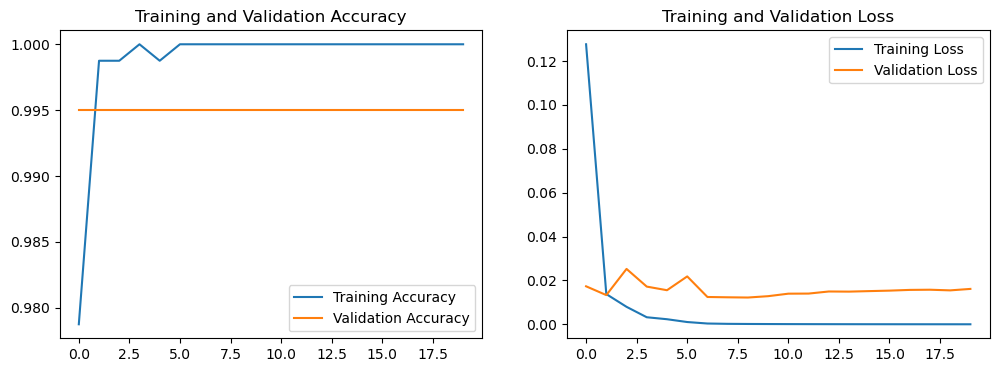

In [13]:
def plot_history(history):
    """
    Plots the training history.
    
    Args:
        history: A TensorFlow History object containing training metrics.
    """
    # Extract training metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Define the range of epochs for x-axis
    epochs_range = range(len(acc))
    
    # Create a new figure for plotting
    plt.figure(figsize=(12, 4))
    
    # Subplot 1: Training and validation accuracy
    plt.subplot(1, 2, 1) #the figure has 1 row, 2 columns, and this plot is the first plot.
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    # Subplot 2: Training and validation loss
    plt.subplot(1, 2, 2) #the figure has 1 row, 2 columns, and this plot is the second plot.
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    # Display the plot
    plt.show()

# Plot the training history
plot_history(history)


## Part 9: Making Predictions and Visualizing Results

1/1 [==============================] - 0s 27ms/step


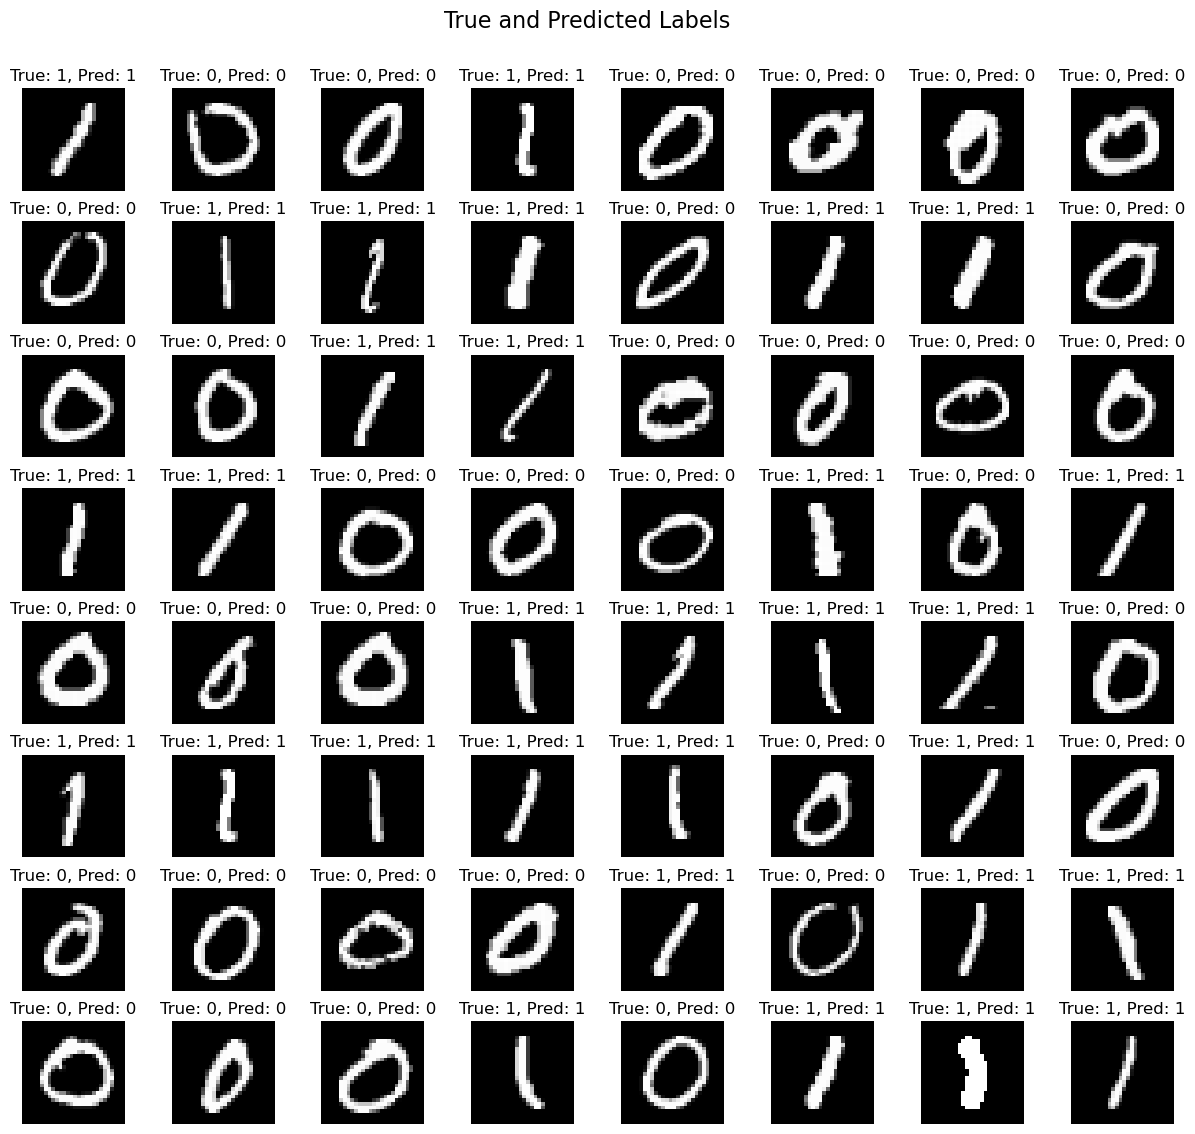

In [14]:
# Prepare a function to make predictions and visualize them along with the true labels
def predict_and_visualize(model, X, y):
    """
    Predicts using the model on a random sample of X, visualizes the images,
    their predicted labels, and their true labels.
    
    Args:
        model: The trained neural network model.
        X: The input features (flattened images).
        y: The true labels.
    """
    fig, axes = plt.subplots(8, 8, figsize=(12, 12))
    fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  # [left, bottom, right, top]

    for i, ax in enumerate(axes.flat):
        # Select random indices
        random_index = np.random.randint(0, X.shape[0])
        
        # Reshape the image for visualization
        X_random_reshaped = X[random_index].reshape(28, 28)
        
        # Display the image
        ax.imshow(X_random_reshaped, cmap='gray')
        
        # Predict using the Neural Network and reshape X for prediction
        prediction = model.predict(X[random_index].reshape(1, 784))
        
        # Determine the predicted class based on the probability
        yhat = 1 if prediction >= 0.5 else 0
        
        # Display the label and prediction above the image
        ax.set_title(f"True: {y[random_index,0]}, Pred: {yhat}")
        ax.axis('off')

    fig.suptitle("True and Predicted Labels", fontsize=16)
    plt.show()

# Call the function to make predictions and visualize
predict_and_visualize(model, X, y)
